In [ ]:
from google.colab import drive
import os
import json
import pandas as pd

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATASET_PATH = "/content/drive/MyDrive/ocr"  # change this
IMAGES_PATH = os.path.join(DATASET_PATH, "images")
LABELS_PATH = os.path.join(DATASET_PATH, "labels")
OUTPUT_PATH = os.path.join(DATASET_PATH, "dataset.json")

In [ ]:
os.makedirs(OUTPUT_PATH, exist_ok=True)

In [ ]:
class_map = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'cb', 'comma', 'ob']

In [ ]:
from PIL import Image

for label_file in os.listdir(LABELS_PATH):
    if not label_file.endswith(".txt") and not label_file.endswith(".csv"):
        continue

    # Match image name
    image_name = os.path.splitext(label_file)[0] + ".jpg"
    image_path = os.path.join(IMAGES_PATH, image_name)

    if not os.path.exists(image_path):
        continue

    # Load image to get size
    img = Image.open(image_path)
    W, H = img.size

    # Read YOLO label file
    label_path = os.path.join(LABELS_PATH, label_file)
    try:
        df = pd.read_csv(label_path, sep=" ", header=None)  # YOLO txt
    except:
        df = pd.read_csv(label_path)  # fallback if csv with commas

    converted = []

    for _, row in df.iterrows():
        class_id = int(row[0])
        x_center, y_center, w, h = row[1], row[2], row[3], row[4]

        # Convert YOLO normalized → absolute coordinates
        x1 = (x_center - w/2) * W
        y1 = (y_center - h/2) * H
        x2 = (x_center + w/2) * W
        y2 = (y_center + h/2) * H

        converted.append([class_map[class_id], x1, y1, x2, y2])

    # Save per-image CSV
    out_file = os.path.join(OUTPUT_PATH, os.path.splitext(image_name)[0] + ".csv")
    pd.DataFrame(converted, columns=["text", "x1", "y1", "x2", "y2"]).to_csv(out_file, index=False)

print("✅ Conversion complete! All per-image CSVs saved in:", OUTPUT_PATH)

✅ Conversion complete! All per-image CSVs saved in: /content/drive/MyDrive/ocr/dataset.json


In [ ]:
import os

LABELS_PATH = "/content/drive/MyDrive/ocr/labels"
OUTPUT_PATH = "/content/drive/MyDrive/ocr/dataset.json"

# Count files
label_files = [f for f in os.listdir(LABELS_PATH) if f.endswith(".txt") or f.endswith(".csv")]
converted_files = [f for f in os.listdir(OUTPUT_PATH) if f.endswith(".csv")]

print("📂 Label files count:     ", len(label_files))
print("📂 Converted files count:", len(converted_files))

# Optional: check mismatches
label_names = set(os.path.splitext(f)[0] for f in label_files)
converted_names = set(os.path.splitext(f)[0] for f in converted_files)

missing = label_names - converted_names
extra = converted_names - label_names

if missing:
    print("\n⚠️ Missing converted CSVs for:", missing)
if extra:
    print("\n⚠️ Extra converted CSVs not in labels folder:", extra)
if not missing and not extra:
    print("\n✅ All labels converted correctly!")


📂 Label files count:      66
📂 Converted files count: 66

✅ All labels converted correctly!


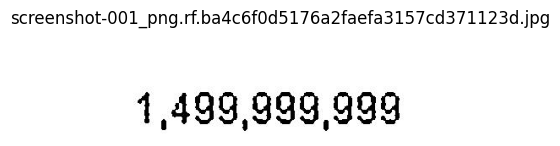

,text,x1,y1,x2,y2
0,1,120.855,66.180,145.225,110.440
1,comma,150.175,99.515,163.165,118.685
2,4,162.185,67.515,188.875,112.865
3,9,190.850,68.180,217.490,112.380
4,9,219.520,66.850,245.140,110.930


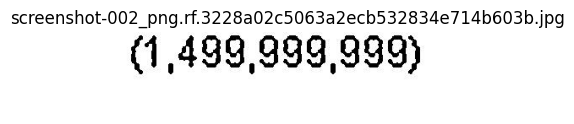

,text,x1,y1,x2,y2
0,ob,104.185,1.750000e-01,124.855,54.605
1,9,410.845,-2.692291e-15,436.715,45.880
2,cb,436.725,2.180000e+00,454.655,52.180
3,1,123.510,2.185000e+00,142.310,45.395
4,comma,149.510,3.217500e+01,163.650,54.605


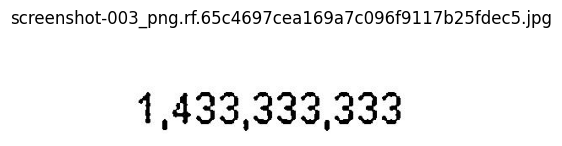

,text,x1,y1,x2,y2
0,1,124.850,68.185,145.710,111.895
1,comma,151.515,98.180,160.745,118.680
2,4,162.180,68.185,189.360,113.835
3,3,191.515,69.510,217.485,109.950
4,3,220.185,68.180,243.195,110.920


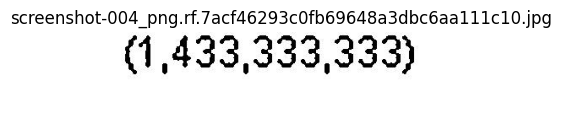

,text,x1,y1,x2,y2
0,ob,102.535,2.175,126.845,54.605
1,1,122.845,0.850,144.735,46.850
2,comma,149.520,32.175,162.200,50.725
3,4,162.850,2.180,191.790,45.880
4,3,190.180,3.515,218.460,42.965


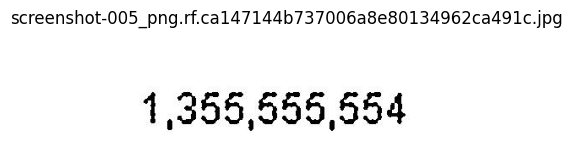

,text,x1,y1,x2,y2
0,1,122.180,67.520,147.160,114.320
1,comma,150.850,98.185,163.650,119.175
2,3,164.845,65.520,190.815,114.320
3,5,193.510,66.180,217.970,112.380
4,5,218.845,64.845,247.555,111.895


In [ ]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

IMAGES_PATH = "/content/drive/MyDrive/ocr/images"
OUTPUT_PATH = "/content/drive/MyDrive/ocr/dataset.json"

# Get first 5 converted CSVs
converted_files = sorted([f for f in os.listdir(OUTPUT_PATH) if f.endswith(".csv")])[:5]

for csv_file in converted_files:
    # Match image file
    image_name = os.path.splitext(csv_file)[0] + ".jpg"
    image_path = os.path.join(IMAGES_PATH, image_name)
    csv_path = os.path.join(OUTPUT_PATH, csv_file)

    # Show image
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title(image_name)
    plt.show()

    # Show CSV (converted labels)
    df = pd.read_csv(csv_path)
    display(df.head())   # small neat table (works well in Colab)


In [ ]:
import os
import pandas as pd

OUTPUT_PATH = "/content/drive/MyDrive/ocr/dataset.json"
FINAL_CSV = "/content/drive/MyDrive/ocr/all_numbers.csv"

all_numbers = []

# Process each per-image CSV
for csv_file in sorted(os.listdir(OUTPUT_PATH)):
    if not csv_file.endswith(".csv"):
        continue

    csv_path = os.path.join(OUTPUT_PATH, csv_file)
    df = pd.read_csv(csv_path)

    # Filter out symbols (keep only digits 0-9)
    number_texts = [str(t) for t in df['text'] if t.isdigit()]

    # Combine all digits into one number string
    full_number = ''.join(number_texts)

    # Save
    image_name = os.path.splitext(csv_file)[0] + ".jpg"
    all_numbers.append([image_name, full_number])

# Save all to a single CSV
pd.DataFrame(all_numbers, columns=["image_name", "number"]).to_csv(FINAL_CSV, index=False)

print(f"✅ Saved all numbers to {FINAL_CSV}")


✅ Saved all numbers to /content/drive/MyDrive/ocr/all_numbers.csv


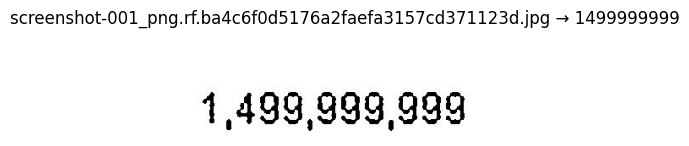

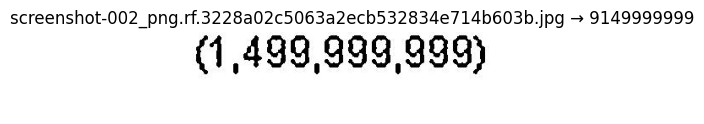

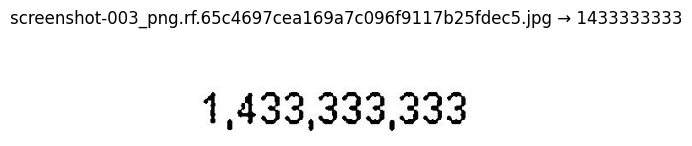

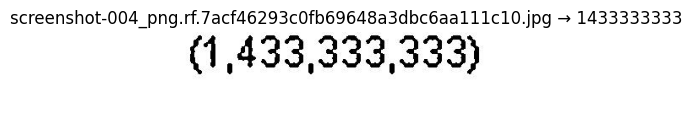

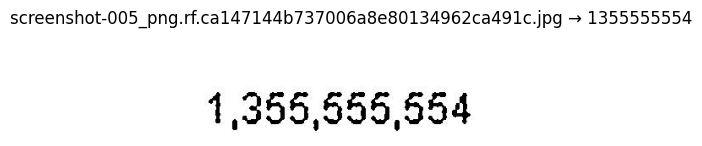

In [ ]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os

# Paths
IMAGES_PATH = "/content/drive/MyDrive/ocr/images"
FINAL_CSV = "/content/drive/MyDrive/ocr/all_numbers.csv"

# Read the final CSV
df_numbers = pd.read_csv(FINAL_CSV)

# Show first 5 images and their numbers
for idx, row in df_numbers.head(5).iterrows():
    image_name = row['image_name']
    number = row['number']

    image_path = os.path.join(IMAGES_PATH, image_name)
    img = Image.open(image_path)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{image_name} → {number}", fontsize=12)
    plt.show()


# Easy OCR

In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 21.7 MB/s eta 0:00:00


In [ ]:
!pip install tqdm

In [ ]:
import easyocr
import pandas as pd
import os
from PIL import Image
import numpy as np
from tqdm import tqdm  # progress bar

# Paths
IMAGES_PATH = "/content/drive/MyDrive/ocr/images"
LABELS_PATH = "/content/drive/MyDrive/ocr/dataset.json"
FINAL_CSV = "/content/drive/MyDrive/ocr/all_numbers.csv"

# Read final CSV
df_numbers = pd.read_csv(FINAL_CSV)

# Load EasyOCR
reader = easyocr.Reader(['en'])

# Metrics storage
cer_list = []
iou_list = []
score_list = []

def cer(gt, pred):
    # Character Error Rate
    import editdistance
    return editdistance.eval(pred, gt) / max(len(gt), 1)

def iou(box1, box2):
    # box = [x1, y1, x2, y2]
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)
    box1Area = (box1[2]-box1[0])*(box1[3]-box1[1])
    box2Area = (box2[2]-box2[0])*(box2[3]-box2[1])
    iou_val = interArea / float(box1Area + box2Area - interArea + 1e-6)
    return iou_val

# Evaluate EasyOCR with progress bar
for idx, row in tqdm(df_numbers.iterrows(), total=len(df_numbers), desc="EasyOCR Evaluation"):
    image_name = row['image_name']
    gt_number = str(row['number']) # Convert gt_number to string
    image_path = os.path.join(IMAGES_PATH, image_name)
    label_csv_path = os.path.join(LABELS_PATH, os.path.splitext(image_name)[0]+'.csv')

    # Load image
    img = np.array(Image.open(image_path))

    # Ground truth bounding boxes
    gt_df = pd.read_csv(label_csv_path)
    gt_boxes = gt_df[['x1','y1','x2','y2']].values.tolist()

    # EasyOCR prediction
    result = reader.readtext(img)
    if len(result) == 0:
        pred_text = ''
        pred_boxes = []
    else:
        pred_text = ''.join([t[1] for t in result])
        pred_boxes = [ [t[0][0][0], t[0][0][1], t[0][2][0], t[0][2][1]] for t in result]

    # Pure number
    pred_number = ''.join([c for c in pred_text if c.isdigit()])

    # CER
    cer_val = cer(gt_number, pred_number)
    cer_list.append(cer_val)

    # IoU (calculate max IoU for each ground truth box)
    if len(gt_boxes) > 0 and len(pred_boxes) > 0:
        max_ious = []
        for gt_box in gt_boxes:
            ious = [iou(gt_box, pred_box) for pred_box in pred_boxes]
            max_ious.append(max(ious))
        iou_list.append(np.mean(max_ious))
    else:
        iou_list.append(0) # Append 0 if no ground truth or predicted boxes

    # Number accuracy
    correct_ratio = sum([1 for a,b in zip(gt_number, pred_number) if a==b])/max(len(gt_number),1)
    score_list.append(correct_ratio)

# Final metrics
mean_cer = np.mean(cer_list)
mean_iou = np.mean(iou_list)
mean_score = np.mean(score_list)

print(f"\nEasyOCR results:")
print(f"Mean CER: {mean_cer:.4f}")
print(f"Mean IoU: {mean_iou:.4f}")
print(f"Mean number accuracy: {mean_score:.4f}")

EasyOCR Evaluation:   0%|          | 0/66 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
EasyOCR Evaluation:   2%|▏         | 1/66 [00:01<01:35,  1.47s/it]/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
EasyOCR Evaluation:   3%|▎         | 2/66 [00:03<01:42,  1.60s/it]/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
EasyOCR Evaluation:   5%|▍         | 3/66 [00:04<01:39,  1.57s/it]/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: Us


EasyOCR results:
Mean CER: 0.1211
Mean IoU: 0.0629
Mean number accuracy: 0.8570


In [ ]:
# Store first 5 predictions for display
sample_predictions = []

for idx, row in df_numbers.iterrows():
    if len(sample_predictions) >= 5:
        break
    image_name = row['image_name']
    gt_number = str(row['number'])

    # Load predicted CSV (or already predicted in your loop)
    image_path = os.path.join(IMAGES_PATH, image_name)
    img = np.array(Image.open(image_path))
    result = reader.readtext(img)
    if len(result) == 0:
        pred_text = ''
    else:
        pred_text = ''.join([t[1] for t in result])
    pred_number = ''.join([c for c in pred_text if c.isdigit()])

    sample_predictions.append([image_name, gt_number, pred_number])

# Display nicely
print("First 5 predictions:")
for i, (img_name, gt, pred) in enumerate(sample_predictions, 1):
    print(f"{i}. Image: {img_name}")
    print(f"   Ground truth: {gt}")
    print(f"   Predicted:    {pred}\n")


First 5 predictions:
1. Image: screenshot-001_png.rf.ba4c6f0d5176a2faefa3157cd371123d.jpg
   Ground truth: 1499999999
   Predicted:    1499999999

2. Image: screenshot-002_png.rf.3228a02c5063a2ecb532834e714b603b.jpg
   Ground truth: 9149999999
   Predicted:    1499999999

3. Image: screenshot-003_png.rf.65c4697cea169a7c096f9117b25fdec5.jpg
   Ground truth: 1433333333
   Predicted:    1433333333

4. Image: screenshot-004_png.rf.7acf46293c0fb69648a3dbc6aa111c10.jpg
   Ground truth: 1433333333
   Predicted:    1433333333

5. Image: screenshot-005_png.rf.ca147144b737006a8e80134962ca491c.jpg
   Ground truth: 1355555554
   Predicted:    1355555554



# Tesseract

In [ ]:
!sudo apt install tesseract-ocr -y
!pip install pytesseract tqdm editdistance

import pytesseract
import pandas as pd
import os
from PIL import Image
import numpy as np
from tqdm import tqdm

# Paths
IMAGES_PATH = "/content/drive/MyDrive/ocr/images"
LABELS_PATH = "/content/drive/MyDrive/ocr/dataset.json"
FINAL_CSV = "/content/drive/MyDrive/ocr/all_numbers.csv"

# Read final CSV
df_numbers = pd.read_csv(FINAL_CSV)

# Metrics storage
cer_list = []
iou_list = []
score_list = []

def cer(gt, pred):
    import editdistance
    return editdistance.eval(pred, gt) / max(len(gt), 1)

def iou(box1, box2):
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)
    box1Area = (box1[2]-box1[0])*(box1[3]-box1[1])
    box2Area = (box2[2]-box2[0])*(box2[3]-box2[1])
    return interArea / float(box1Area + box2Area - interArea + 1e-6)

# Evaluate Tesseract with progress bar
for idx, row in tqdm(df_numbers.iterrows(), total=len(df_numbers), desc="Tesseract Evaluation"):
    image_name = row['image_name']
    gt_number = str(row['number'])
    image_path = os.path.join(IMAGES_PATH, image_name)
    label_csv_path = os.path.join(LABELS_PATH, os.path.splitext(image_name)[0]+'.csv')

    # Load image
    img = Image.open(image_path)

    # Ground truth boxes
    gt_df = pd.read_csv(label_csv_path)
    gt_boxes = gt_df[['x1','y1','x2','y2']].values.tolist()

    # Tesseract prediction (boxes per character)
    boxes_data = pytesseract.image_to_boxes(img)
    pred_boxes = []
    pred_text = ""
    W, H = img.size
    for line in boxes_data.splitlines():
        parts = line.split()
        char, x1, y1, x2, y2 = parts[0], int(parts[1]), int(parts[2]), int(parts[3]), int(parts[4])
        # Tesseract uses bottom-left origin, convert to top-left origin
        y1_new = H - int(parts[4])
        y2_new = H - int(parts[2])
        pred_boxes.append([x1, y1_new, x2, y2_new])
        pred_text += char

    # Pure number
    pred_number = ''.join([c for c in pred_text if c.isdigit()])

    # CER
    cer_val = cer(gt_number, pred_number)
    cer_list.append(cer_val)

    # IoU (max IoU for each ground truth box)
    if len(gt_boxes) > 0 and len(pred_boxes) > 0:
        max_ious = []
        for gt_box in gt_boxes:
            ious = [iou(gt_box, pred_box) for pred_box in pred_boxes]
            max_ious.append(max(ious))
        iou_list.append(np.mean(max_ious))
    else:
        iou_list.append(0)

    # Number accuracy
    correct_ratio = sum([1 for a,b in zip(gt_number, pred_number) if a==b])/max(len(gt_number),1)
    score_list.append(correct_ratio)

# Final metrics
mean_cer = np.mean(cer_list)
mean_iou = np.mean(iou_list)
mean_score = np.mean(score_list)

print(f"\nTesseract OCR results:")
print(f"Mean CER: {mean_cer:.4f}")
print(f"Mean IoU: {mean_iou:.4f}")
print(f"Mean number accuracy: {mean_score:.4f}")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


Tesseract Evaluation: 100%|██████████| 66/66 [00:14<00:00,  4.70it/s]


Tesseract OCR results:
Mean CER: 0.2391
Mean IoU: 0.5830
Mean number accuracy: 0.7426


# Tr OCR

In [ ]:
!pip install transformers datasets torch torchvision

In [ ]:
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import pandas as pd
import os
import numpy as np
from tqdm import tqdm
import editdistance

# Paths
IMAGES_PATH = "/content/drive/MyDrive/ocr/images"
LABELS_PATH = "/content/drive/MyDrive/ocr/dataset.json"
FINAL_CSV = "/content/drive/MyDrive/ocr/all_numbers.csv"

# Read final CSV
df_numbers = pd.read_csv(FINAL_CSV)

# Load TrOCR model & processor
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Metrics storage
cer_list = []
iou_list = []
score_list = []

def cer(gt, pred):
    return editdistance.eval(pred, gt) / max(len(gt),1)

def iou(box1, box2):
    # box = [x1, y1, x2, y2]
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])
    interArea = max(0, xB - xA) * max(0, yB - yA)
    box1Area = (box1[2]-box1[0])*(box1[3]-box1[1])
    box2Area = (box2[2]-box2[0])*(box2[3]-box2[1])
    return interArea / float(box1Area + box2Area - interArea + 1e-6)

# Evaluate TrOCR with progress bar
for idx, row in tqdm(df_numbers.iterrows(), total=len(df_numbers), desc="TrOCR Evaluation"):
    image_name = row['image_name']
    gt_number = str(row['number'])
    image_path = os.path.join(IMAGES_PATH, image_name)
    label_csv_path = os.path.join(LABELS_PATH, os.path.splitext(image_name)[0]+'.csv')

    # Load image
    img = Image.open(image_path).convert("RGB")

    # Ground truth boxes
    gt_df = pd.read_csv(label_csv_path)
    gt_boxes = gt_df[['x1','y1','x2','y2']].values.tolist()

    # Merge all GT boxes into one (TrOCR does not give per-character boxes)
    if len(gt_boxes) > 0:
        x1 = min([b[0] for b in gt_boxes])
        y1 = min([b[1] for b in gt_boxes])
        x2 = max([b[2] for b in gt_boxes])
        y2 = max([b[3] for b in gt_boxes])
        merged_gt_box = [[x1, y1, x2, y2]]*4
    else:
        merged_gt_box = [[0,0,0,0]]*4

    # TrOCR prediction
    pixel_values = processor(images=img, return_tensors="pt").pixel_values.to(device)
    generated_ids = model.generate(pixel_values)
    pred_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    # Pure number
    pred_number = ''.join([c for c in pred_text if c.isdigit()])

    # CER
    cer_val = cer(gt_number, pred_number)
    cer_list.append(cer_val)

    # IoU (use merged GT box vs full image as predicted box)
    W, H = img.size
    pred_box = [[0,0,W,H]]*4
    iou_vals = [iou(merged_gt_box[i], pred_box[i]) for i in range(4)]
    iou_list.append(np.mean(iou_vals))

    # Number accuracy
    correct_ratio = sum([1 for a,b in zip(gt_number, pred_number) if a==b])/max(len(gt_number),1)
    score_list.append(correct_ratio)

# Final metrics
mean_cer = np.mean(cer_list)
mean_iou = np.mean(iou_list)
mean_score = np.mean(score_list)

print(f"\nTrOCR results:")
print(f"Mean CER: {mean_cer:.4f}")
print(f"Mean IoU (approx): {mean_iou:.4f}")
print(f"Mean number accuracy: {mean_score:.4f}")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

TrOCR Evaluation: 100%|██████████| 66/66 [08:28<00:00,  7.70s/it]


TrOCR results:
Mean CER: 0.4881
Mean IoU (approx): 0.2253
Mean number accuracy: 0.5302


In [ ]:
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import pandas as pd
import os
from tqdm import tqdm
import editdistance
import numpy as np

# Paths
IMAGES_PATH = "/content/drive/MyDrive/ocr/images"
FINAL_CSV = "/content/drive/MyDrive/ocr/all_numbers.csv"

# Read final CSV
df_numbers = pd.read_csv(FINAL_CSV)

# Load TrOCR model & processor
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Metrics storage
cer_list = []
score_list = []

# CER function
def cer(gt, pred):
    return editdistance.eval(pred, gt) / max(len(gt), 1)

# Evaluate TrOCR
for idx, row in tqdm(df_numbers.iterrows(), total=len(df_numbers), desc="TrOCR Evaluation"):
    image_name = row['image_name']
    gt_number = str(row['number'])
    image_path = os.path.join(IMAGES_PATH, image_name)

    # Load image
    img = Image.open(image_path).convert("RGB")

    # TrOCR prediction
    pixel_values = processor(images=img, return_tensors="pt").pixel_values.to(device)
    generated_ids = model.generate(pixel_values)
    pred_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    # Extract only digits
    pred_number = ''.join([c for c in pred_text if c.isdigit()])

    # CER
    cer_val = cer(gt_number, pred_number)
    cer_list.append(cer_val)

    # Number accuracy
    correct_ratio = sum([1 for a,b in zip(gt_number, pred_number) if a==b]) / max(len(gt_number), 1)
    score_list.append(correct_ratio)

# Final metrics
mean_cer = np.mean(cer_list)
mean_score = np.mean(score_list)

print(f"\nTrOCR results:")
print(f"Mean CER: {mean_cer:.4f}")
print(f"Mean number accuracy: {mean_score:.4f}")

# Optional: preview first 5 predictions
print("\nFirst 5 predictions vs ground truth:")
for i in range(5):
    gt = str(df_numbers.loc[i, 'number'])
    pred_text = processor.batch_decode(model.generate(processor(images=Image.open(os.path.join(IMAGES_PATH, df_numbers.loc[i, 'image_name'])).convert("RGB"), return_tensors="pt").pixel_values.to(device)), skip_special_tokens=True)[0]
    pred = ''.join([c for c in pred_text if c.isdigit()])
    print(f"GT: {gt}  |  Pred: {pred}")


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
TrOCR Evaluation: 100%|██████████| 66/66 [08:28<00:00,  7.71s/it]



TrOCR results:
Mean CER: 0.4881
Mean number accuracy: 0.5302

First 5 predictions vs ground truth:
GT: 1499999999  |  Pred: 11499999999
GT: 9149999999  |  Pred: 61610101010101000000000
GT: 1433333333  |  Pred: 114333333333
GT: 1433333333  |  Pred: 6161433333
GT: 1355555554  |  Pred: 11355555554


# MM OCR

In [ ]:
# Uninstall everything first
!pip uninstall mmocr mmdet mmcv-full mmengine -y

# Install the NEW compatible versions that work with Python 3.12
!pip install mmcv>=2.0.0
!pip install mmdet>=3.0.0
!pip install mmocr>=1.0.0
!pip install mmengine
!pip install editdistance tqdm pandas pillow numpy

Found existing installation: mmocr 0.6.1
Uninstalling mmocr-0.6.1:
  Successfully uninstalled mmocr-0.6.1
Found existing installation: mmdet 2.28.1
Uninstalling mmdet-2.28.1:
  Successfully uninstalled mmdet-2.28.1
Found existing installation: mmengine 0.10.7
Uninstalling mmengine-0.10.7:
  Successfully uninstalled mmengine-0.10.7
ERROR: Operation cancelled by user


KeyboardInterrupt: 

In [ ]:
import torch
from mmocr.apis import init_detector, model_inference
from PIL import Image
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import editdistance

ModuleNotFoundError: No module named 'mmcv'

In [ ]:
!sudo apt-get update -y
!sudo apt-get install python3.10 python3.10-distutils -y
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1
!sudo update-alternatives --config python3
!curl -sS https://bootstrap.pypa.io/get-pip.py | python3.10


Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,008 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,802 kB]
Get:13 https://ppa.launchpadcontent.net/deadsnakes/ppa/ub

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!pip install torch==2.2.2 torchvision==0.17.2 --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.3/757.3 MB 32.0 MB/s  0:00:14
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 86.6 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 186.3 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.5 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 160.4 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 27.8 MB/s  0:00:16
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 46.9 MB/s  0:00:06
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 67.6 MB/s  0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 60.3 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 67.3 MB/s  0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 72.6 MB/s  0:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 72.0 MB/

In [ ]:

!pip install -U openmim
!mim install mmengine
!mim install mmcv
!mim install mmdet


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/usr/local/bin/mim", line 7, in <module>
    sys.exit(cli())
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1462, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1383, in main
    rv = self.invoke(ctx)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1850, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1246, in in

In [ ]:
!git clone https://github.com/open-mmlab/mmocr.git
%cd mmocr
!pip install -v -e .


fatal: destination path 'mmocr' already exists and is not an empty directory.
/content/mmocr/mmocr
Using pip 25.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Obtaining file:///content/mmocr/mmocr
ERROR: file:///content/mmocr/mmocr does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


# Paddle OCR

In [ ]:

import pandas as pd
import os
from tqdm import tqdm
import editdistance
import numpy as np
import cv2
from paddleocr import PaddleOCR

# Paths
IMAGES_PATH = "/content/drive/MyDrive/ocr/images"
FINAL_CSV = "/content/drive/MyDrive/ocr/all_numbers.csv"

# Read final CSV
df_numbers = pd.read_csv(FINAL_CSV)

# Initialize PaddleOCR (English)
ocr = PaddleOCR(lang='en', use_angle_cls=False)  # angle_cls deprecated; for numbers, it's fine

# Metrics storage
cer_list = []
score_list = []
results = {'GT': [], 'Pred': [], 'RawOCR': []}

# CER function
def cer(gt, pred):
    return editdistance.eval(pred, gt) / max(len(gt), 1)

# Image preprocessing for numeric OCR
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        return None
    # Convert BGR to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY_INV, 15, 10)
    # Resize to height 64 while keeping aspect ratio
    h, w = thresh.shape
    new_h = 64
    new_w = int((w / h) * new_h)
    resized = cv2.resize(thresh, (new_w, new_h))
    # Convert back to RGB
    rgb_img = cv2.cvtColor(resized, cv2.COLOR_GRAY2RGB)
    return rgb_img

# Evaluate PaddleOCR
for idx, row in tqdm(df_numbers.iterrows(), total=len(df_numbers), desc="PaddleOCR Evaluation"):
    image_name = row['image_name']
    gt_number = str(row['number'])
    image_path = os.path.join(IMAGES_PATH, image_name)

    img = preprocess_image(image_path)
    if img is None:
        print(f"Warning: Could not load image {image_path}")
        cer_list.append(1.0)
        score_list.append(0.0)
        results['GT'].append(gt_number)
        results['Pred'].append('')
        results['RawOCR'].append('')
        continue

    # PaddleOCR prediction
    try:
        result = ocr.predict(img)
        pred_text = ""
        if result and result[0]:
            # Extract detected text
            texts = [line[1][0] for line in result[0]]
            pred_text = " ".join(texts)
        pred_number = ''.join([c for c in pred_text if c.isdigit()])

        # Save results
        results['GT'].append(gt_number)
        results['Pred'].append(pred_number)
        results['RawOCR'].append(pred_text)

        # CER
        cer_val = cer(gt_number, pred_number)
        cer_list.append(cer_val)

        # Number accuracy
        correct_ratio = sum([1 for a, b in zip(gt_number, pred_number) if a == b]) / max(len(gt_number), 1)
        score_list.append(correct_ratio)

    except Exception as e:
        print(f"Error processing {image_name}: {e}")
        cer_list.append(1.0)
        score_list.append(0.0)
        results['GT'].append(gt_number)
        results['Pred'].append('')
        results['RawOCR'].append('')

# Final metrics
mean_cer = np.mean(cer_list)
mean_score = np.mean(score_list)

print(f"\nPaddleOCR results:")
print(f"Mean CER: {mean_cer:.4f}")
print(f"Mean number accuracy: {mean_score:.4f}")

# Preview first 5 predictions
print("\nFirst 5 predictions vs ground truth:")
for i in range(min(5, len(df_numbers))):
    print(f"GT: {results['GT'][i]}  |  Pred: {results['Pred'][i]}  |  Raw OCR: {results['RawOCR'][i]}")


/tmp/ipython-input-4215926212.py:17: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  ocr = PaddleOCR(lang='en', use_angle_cls=False)  # angle_cls deprecated; for numbers, it's fine
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/UVDoc`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/root/.paddlex/official_models/PP-OCRv5_server_det`.
Creating model: ('en_PP-OCRv5_mobile_rec', None)
Model files already exist. Using cached files. To redownload, please delete the director


PaddleOCR results:
Mean CER: 1.0000
Mean number accuracy: 0.0000

First 5 predictions vs ground truth:
GT: 1499999999  |  Pred:   |  Raw OCR: n a o t o e e e e e e e i e e
GT: 9149999999  |  Pred:   |  Raw OCR: n a o t o e e e e e e e i e e
GT: 1433333333  |  Pred:   |  Raw OCR: n a o t o e e e e e e e i e e
GT: 1433333333  |  Pred:   |  Raw OCR: n a o t o e e e e e e e i e e
GT: 1355555554  |  Pred:   |  Raw OCR: n a o t o e e e e e e e i e e


In [ ]:
!pip install paddlepaddle==2.6.2 paddleocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.9/125.9 MB 8.2 MB/s eta 0:00:00
  Attempting uninstall: paddlepaddle
    Found existing installation: paddlepaddle 3.2.0
    Uninstalling paddlepaddle-3.2.0:
      Successfully uninstalled paddlepaddle-3.2.0
